In [ ]:
## DT using mtcars dataset

In [42]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [44]:
df = data('mtcars')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [45]:
df.shape

(32, 11)

In [46]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [47]:
df.groupby('am').size()

am
0    19
1    13
dtype: int64

In [48]:
# Predict Class (am = 0 or 1, depending upon other IV)

In [49]:
# class - am 
X = df.drop(['am'], axis=1) #df.drop(['A'], axis=1)
y = df['am']
print(pd.concat([X,y], axis=1)[1:5])

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  gear  carb  am
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0     4     4   1
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1     4     1   1
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1     3     1   0
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0     3     2   0


In [50]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state=1)
# 70% to training the model

In [52]:
print(X_train.shape, X_test.shape)

(22, 10) (10, 10)


In [53]:
# Model
from sklearn.tree import DecisionTreeClassifier

In [55]:
#clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(max_depth=4)
clf1 = clf1.fit(X_train, y_train)
print(clf1)

DecisionTreeClassifier(max_depth=4)


In [56]:
y_pred1 = clf1.predict(X_test)
print(y_pred1)

[1 0 0 1 0 1 0 0 1 0]


In [57]:
clf1.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [58]:
np.vstack([y_test, y_pred1])

array([[1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [59]:
# Accuracy/ Evaluate
from sklearn import metrics

In [60]:
print( 'Accuracy', metrics.accuracy_score(y_test, y_pred1))
#above .5 can be considered good

Accuracy 0.9


In [61]:
feature_columns = X.columns

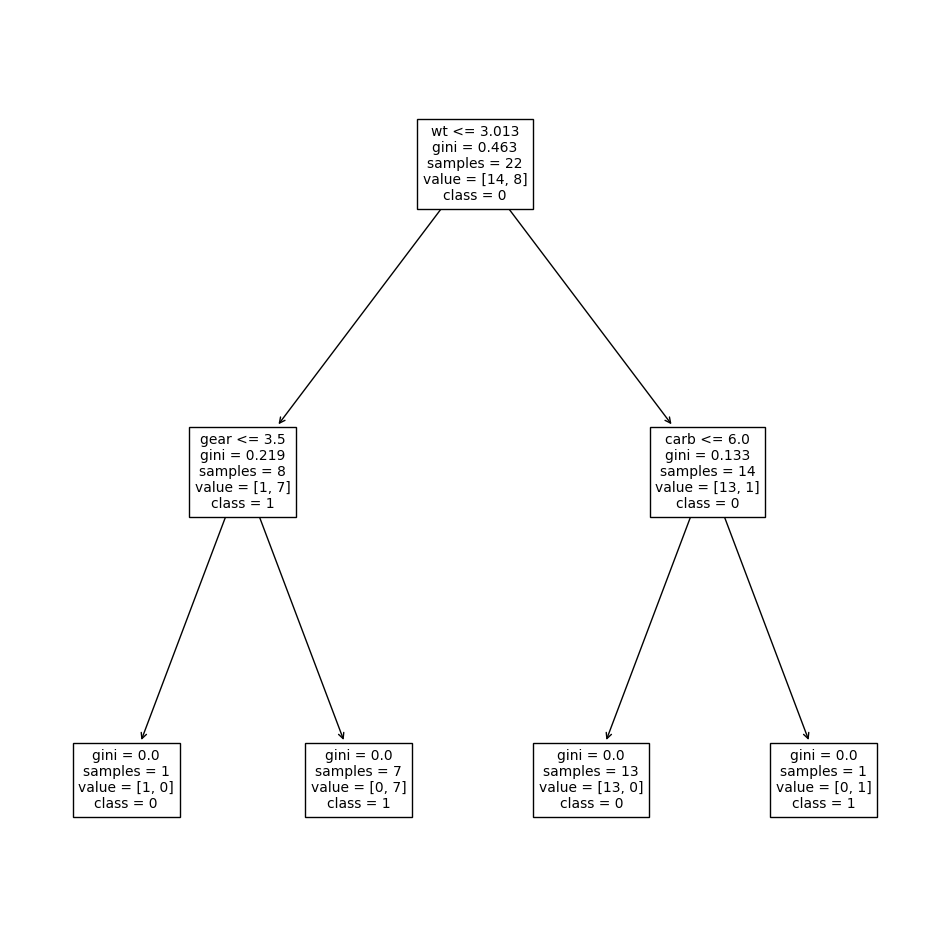

In [71]:
from sklearn import tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf1, fontsize=10, feature_names=feature_columns,  class_names=['0','1'])
plt.show()

In [63]:
trainXy = pd.concat([X_train, y_train], axis=1)
trainXy.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb,am
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,3,2,0
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,4,4,0
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,3,1,0
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,5,2,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,0


In [64]:
trainXy.shape

(22, 11)

In [67]:
trainXy.loc[trainXy['wt'] >= 3.013, ].shape

(14, 11)

In [69]:
trainXy.loc[(trainXy['wt'] > 3.013), ].groupby('am').size()

am
0    13
1     1
dtype: int64